In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Load datasets
media_contacts = pd.read_csv("../data/raw/media_contacts.csv")
socio_demos = pd.read_csv("../data/raw/socio_demos.csv")

# Initial data overview and cleaning

## 1. Media Contacts Dataset

Let's start with a quick overview:

In [3]:
# Check a few observations
media_contacts.head(10)

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube CTV,Pinterest,Purchase
0,5326201,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,256895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1
2,7894945,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,797459,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,25.0,1
4,5529182,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,17687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,62098432,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
7,56489362,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1
8,275140,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,666280698,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
# Get basic stats on numerical columns
media_contacts.describe()

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube CTV,Pinterest,Purchase
count,1.585400e+04,15854.000000,15854.000000,15854.000000,15853.000000,15852.000000,15853.000000,15850.000000,15851.000000,15852.000000,15853.000000,15851.000000,15853.000000,15854.000000,15854.000000
mean,9.363038e+07,5.736344,0.424877,0.690677,0.191446,0.087055,0.278496,0.046498,0.558766,0.305577,0.068378,0.059870,0.124897,0.669610,0.495080
std,2.185159e+08,9.990565,0.971493,1.692449,1.013844,0.686021,1.371722,0.458838,1.283823,0.989943,0.377071,0.393334,0.571348,3.351949,0.499992
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.410050e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.586395e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.665581e+07,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.988330e+08,113.000000,3.000000,23.000000,18.000000,13.000000,24.000000,9.000000,14.000000,14.000000,8.000000,12.000000,12.000000,63.000000,1.000000


In [5]:
# Check column types and missing values
media_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON ID        15854 non-null  int64  
 1   TV_Total         15854 non-null  float64
 2   FLYERS           15854 non-null  float64
 3   Print_Total      15854 non-null  float64
 4   Online_Video     15853 non-null  float64
 5   Online_Display   15852 non-null  float64
 6   Online Total     15853 non-null  float64
 7   TikTok           15850 non-null  float64
 8   YouTube_Total    15851 non-null  float64
 9   YouTube_Mobile   15852 non-null  float64
 10  YouTube_Desktop  15853 non-null  float64
 11  YouTube_Tablet   15851 non-null  float64
 12  YouTube CTV      15853 non-null  float64
 13  Pinterest        15854 non-null  float64
 14  Purchase         15854 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.8 MB


In [6]:
# Count missing values
media_contacts.isnull().sum()

PERSON ID          0
TV_Total           0
FLYERS             0
Print_Total        0
Online_Video       1
Online_Display     2
Online Total       1
TikTok             4
YouTube_Total      3
YouTube_Mobile     2
YouTube_Desktop    1
YouTube_Tablet     3
YouTube CTV        1
Pinterest          0
Purchase           0
dtype: int64

#### Data Cleaning Considerations  

- **Inconsistent column names**: Standardizing column names will improve readability and ensure consistency across datasets.  
- **Numeric values**: Since all columns contain numeric data, applying **scaling** will be beneficial for model training and improving comparability between features.  
- **Handling missing values**: A small number of blanks are present. Setting them to `0` should be appropriate in this context, as it represents **no exposure** to the media campaign.  

In [7]:
# Converting Purchase to a booleanmostly due to personal preference
media_contacts["Purchase"] = media_contacts["Purchase"].astype(bool)

# Checking that Purchase is a boolean value
print(media_contacts["Purchase"].unique())

[ True False]


Quick look at the various YouTube features and their correlation to each other.

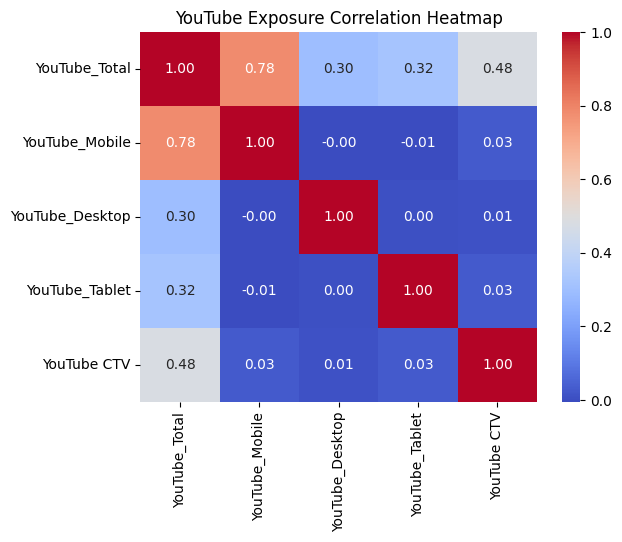

In [8]:
youtube_cols = ["YouTube_Total", "YouTube_Mobile", "YouTube_Desktop", "YouTube_Tablet", "YouTube CTV"]
sns.heatmap(media_contacts[youtube_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("YouTube Exposure Correlation Heatmap")
plt.show()

In [9]:
# Cleaning and standardizing column names
media_contacts = media_contacts.rename(columns=lambda x: x.strip().replace(" ", "_").upper())  # Remove spaces from column names and force uppercase

In [10]:
# Fill missing values in media_contacts with 0 (no exposure)
media_contacts.fillna(0, inplace=True)

## 2. Socio Demos Dataset

Quick overview:

In [11]:
socio_demos.head(20)

,Person ID,weight,BIRTHDAY,Gender,Number_of children,People_in_Household
0,5326201,11032.10,19971001.0,male,0,2-HH
1,256895,2581.77,19730701.0,female,0,2-HH
2,7894945,8219.48,19870201.0,male,1 child,3-HH
3,797459,6040.79,19870401.0,male,2 Children,4-HH
4,5529182,11635.16,19971001.0,male,0,2-HH
5,17687,13456.38,19980401.0,female,0,2-HH
6,62098432,3881.71,19870201.0,female,0,1 -HH (female)
7,56489362,3993.45,19730501.0,female,0,2-HH
8,275140,6353.90,19341201.0,male,0,1-HH (male)
9,666280698,2966.01,19560501.0,male,0,2-HH


In [12]:
socio_demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Person ID            15854 non-null  int64  
 1   weight               15854 non-null  object 
 2   BIRTHDAY             15850 non-null  float64
 3   Gender               15851 non-null  object 
 4   Number_of children   15852 non-null  object 
 5   People_in_Household  15851 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 743.3+ KB


In [13]:
socio_demos.isnull().sum()

Person ID              0
weight                 0
BIRTHDAY               4
Gender                 3
Number_of children     2
People_in_Household    3
dtype: int64

- Much like Media Contacts, column names need to be cleaned up;
- Few blanks that need to be dealt with;
- Most columns are categorical and need a more detailed look. Values seem inconsistent and will need cleaning;

In [14]:
# Cleaning column names
socio_demos = socio_demos.rename(columns=lambda x: x.strip().replace(" ", "_").upper())

### 2.1 Weight
This feature is coming in as an object which is caused by the presence of "#NULL!" values as we can be seen on row 16. I'll need to convert the feature to numeric so that it can be used later down the line. LEt's first make sure that there are no other values that need to taken into account.

In [15]:
# Find non-numeric entries
non_numeric_weights = socio_demos[~socio_demos["WEIGHT"].str.replace(".", "", regex=False).str.isnumeric()]
print(non_numeric_weights["WEIGHT"].unique())

['#NULL!']


In [16]:
socio_demos["WEIGHT"].value_counts(dropna=False)

WEIGHT
#NULL!      2713
718.05       297
3542.77      101
6495.48      101
4240.94       95
            ... 
3530.39        1
14084.80       1
19538.72       1
2982.83        1
3949.47        1
Name: count, Length: 1681, dtype: int64

Post conversion these NULLs will end up as NaNs which will need to be filled and I will use the median value which I prefer over mean as it uses values that are present in the dataset already. If there were more unique values present for this feature I would have gone with mean instead.

In [17]:
# Convert weight to numeric
socio_demos["WEIGHT"] = pd.to_numeric(socio_demos["WEIGHT"], errors="coerce")

In [18]:
# Fill missing 'weight' values using median (since weight distribution may be skewed)
socio_demos["WEIGHT"] = socio_demos["WEIGHT"].fillna(socio_demos["WEIGHT"].median())

### 2.2 Birthday
The date can be converted to age instead which will be much more human-friendly and will allow for some more play when feature engineering. There is no real benefit to keeping the original column so Age will be replacing it.

In [19]:
# Creating AGE
socio_demos['AGE'] = 2025 - pd.to_datetime(socio_demos['BIRTHDAY'], format='%Y%m%d').dt.year

# Fill missing 'Age' values using median
socio_demos["AGE"] = socio_demos["AGE"].fillna(socio_demos["AGE"].median())

# Convert AGE to integer
socio_demos["AGE"] = socio_demos["AGE"].astype(int)

# Drop BIRTHDAY column
socio_demos.drop(columns=["BIRTHDAY"], inplace=True)

### 2.3 Gender

In [20]:
# Check number of unique values as well as number of observation per value
socio_demos["GENDER"].value_counts(dropna=False)

GENDER
male      8330
female    7521
NaN          3
Name: count, dtype: int64

Data looks good and only NaNs need to be taken care of. "UNKNOWN" should be a suitable replacement value. I will convert the values to uppercase just to keep everything consistent.

In [21]:
# Replace blanks with "UNKONWN"
socio_demos["GENDER"] = socio_demos["GENDER"].fillna("UNKNOWN")

# Set all gender values to upper case
socio_demos["GENDER"] = socio_demos["GENDER"].str.upper()

### 2.4 Number of Children

In [22]:
print(socio_demos["NUMBER_OF_CHILDREN"].unique())

['0' '1 child' '2 Children' '3 Kinder' nan]


Messy categorical column but can easily be cleaned up and converted to numerical by taking just the number.

In [23]:
# Convert column to numeric
socio_demos['NUMBER_OF_CHILDREN'] = socio_demos['NUMBER_OF_CHILDREN'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})

# Fill blanks using median values
socio_demos["NUMBER_OF_CHILDREN"] = socio_demos["NUMBER_OF_CHILDREN"].fillna(socio_demos["NUMBER_OF_CHILDREN"].median())

# Convert AGE to integer
socio_demos["NUMBER_OF_CHILDREN"] = socio_demos["NUMBER_OF_CHILDREN"].astype(int)

C:\Users\ksbon\AppData\Local\Temp\ipykernel_22312\1055437148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  socio_demos['NUMBER_OF_CHILDREN'] = socio_demos['NUMBER_OF_CHILDREN'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})


### 2.5 People in Household

In [24]:
# Check unique values and number of observations per value
socio_demos["PEOPLE_IN_HOUSEHOLD"].value_counts(dropna=False)

PEOPLE_IN_HOUSEHOLD
2-HH              6848
1 -HH (female)    2546
1-HH (male)       2368
3-HH              2021
4-HH              1528
5-HH               420
6-HH                92
7-HH                24
NaN                  3
8-HH                 2
10-HH                1
9-HH                 1
Name: count, dtype: int64

Another messy one but can also be converted to numeric using the exact same logic. The single person household optins also contain gender information but since we have a separate gender feature already this is of no use and can be ignored. The column name can be a bit shoerter and less clunky as well.

In [25]:
# Extract the first numeric value from the string and convert to integer
socio_demos["HOUSEHOLD_SIZE"] = socio_demos["PEOPLE_IN_HOUSEHOLD"].str.extract(r'(\d+)').astype(float)

# Fill missing values using median
socio_demos["HOUSEHOLD_SIZE"] = socio_demos["HOUSEHOLD_SIZE"].fillna(socio_demos["HOUSEHOLD_SIZE"].median())

# Drop the original column
socio_demos.drop(columns=["PEOPLE_IN_HOUSEHOLD"], inplace=True)

# Convert AGE to integer
socio_demos["HOUSEHOLD_SIZE"] = socio_demos["HOUSEHOLD_SIZE"].astype(int)


In [26]:
socio_demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERSON_ID           15854 non-null  int64  
 1   WEIGHT              15854 non-null  float64
 2   GENDER              15854 non-null  object 
 3   NUMBER_OF_CHILDREN  15854 non-null  int64  
 4   AGE                 15854 non-null  int64  
 5   HOUSEHOLD_SIZE      15854 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 743.3+ KB


## 3. Person ID Uniqueness Check
I want to have a look at the IDs and check for duplicate records.

In [27]:
# Print number of duplicate values
print(f'Media Contacts duplicate IDs - {media_contacts["PERSON_ID"].duplicated().sum()}')
print(f'Socio Demos duplicate IDs - {socio_demos["PERSON_ID"].duplicated().sum()}')

Media Contacts duplicate IDs - 97
Socio Demos duplicate IDs - 97


97 duplicates for each of the datasets. The matching number dictates some relation rather than just an error in the data. Further investigation is needed and I would like to inspect some individual examples.

In [28]:
# Retrieve all duplicate ids per dataset
dup_ids_media = media_contacts["PERSON_ID"][media_contacts["PERSON_ID"].duplicated(keep=False)]
dup_ids_socio = socio_demos["PERSON_ID"][socio_demos["PERSON_ID"].duplicated(keep=False)]

# Retrieve all duplicate rows per dataset
dup_media_contacts = media_contacts[media_contacts["PERSON_ID"].isin(dup_ids_media)]
dup_socio_demos = socio_demos[socio_demos["PERSON_ID"].isin(dup_ids_socio)]

# Merge duplicates
merged_dupes = pd.merge(dup_media_contacts, dup_socio_demos, left_on="PERSON_ID", right_on="PERSON_ID", how="inner")

# Review duplicate observations
merged_dupes.head(10)

,PERSON_ID,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,ONLINE_TOTAL,TIKTOK,YOUTUBE_TOTAL,YOUTUBE_MOBILE,YOUTUBE_DESKTOP,YOUTUBE_TABLET,YOUTUBE_CTV,PINTEREST,PURCHASE,WEIGHT,GENDER,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE
0,8228,22.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,True,4554.20,MALE,0,57,4
1,8228,22.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,True,2412.49,FEMALE,0,48,1
2,8109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,True,2581.77,FEMALE,0,44,2
3,8109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,True,7020.09,MALE,0,45,1
4,8146,13.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,True,5146.83,FEMALE,0,44,3
5,8146,13.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,True,3961.46,MALE,0,55,4
6,27114,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2079.74,FEMALE,0,85,2
7,27114,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,6452.54,MALE,0,77,2
8,28248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,2653.05,FEMALE,0,48,2
9,28248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,5246.94,MALE,0,56,3


#### Handling Duplicates

The duplicates in the merged dataset appear because the same `PERSON_ID` is associated with different demographic attributes in `socio_demos`. This suggests that `PERSON_ID` may represent a **household rather than an individual**, with multiple household members contributing demographic data.  

Since household members are likely to have **identical exposure to the campaign**, a **one-to-many merge** should be appropriate. This naturally increases the row count, but it is an expected outcome given the structure of the data. 

#### Backup plan
Initially I considered dropping the duplicates or aggregating the data but decided against upon further reflection. I did keep the code just in case.

In [29]:
# Aggregate data
# socio_demos_agg = socio_demos.groupby("Person_ID").agg({
#     "WEIGHT": "mean",  # Average out the weight
#     "GENDER": lambda x: x.mode()[0] if not x.mode().empty else "unknown",  # Keep most common gender
#     "NUMBER_OF_CHILDREN": "max",  # Keep max children
#     "AGE": "mean",  # Average out the age
#     "Age_Group": lambda x: x.mode()[0] if not x.mode().empty else "unknown",
#     "HOUSEHOLD_SIZE": "max"  # Keep max household size
# }).reset_index()

# # Check results
# print(socio_demos_agg[socio_demos_agg["Person_ID"].isin([8228, 8109, 8146, 27114, 28248])])


In [30]:
# Drop duplicates
# media_contacts = media_contacts.drop_duplicates(subset=["PERSON_ID"])
# socio_demos = socio_demos.drop_duplicates(subset=["PERSON_ID"])

# media_contacts.info()
# socio_demos.info()

## 4. Merging Datasets
Let's now merge the two datasets using the provided IDs.

In [31]:
# Merge datasets
data = pd.merge(socio_demos, media_contacts, left_on="PERSON_ID", right_on="PERSON_ID", how="inner")

# Drop Person ID
# data.drop(columns=["PERSON_ID"], inplace=True)

In [32]:
data.head(10)

,PERSON_ID,WEIGHT,GENDER,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,ONLINE_TOTAL,TIKTOK,YOUTUBE_TOTAL,YOUTUBE_MOBILE,YOUTUBE_DESKTOP,YOUTUBE_TABLET,YOUTUBE_CTV,PINTEREST,PURCHASE
0,5326201,11032.10,MALE,0,28,2,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,256895,2581.77,FEMALE,0,52,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,True
2,7894945,8219.48,MALE,1,38,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,True
3,797459,6040.79,MALE,2,38,4,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,25.0,True
4,5529182,11635.16,MALE,0,28,2,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,17687,13456.38,FEMALE,0,27,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
6,62098432,3881.71,FEMALE,0,38,1,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True
7,56489362,3993.45,FEMALE,0,52,2,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,True
8,275140,6353.90,MALE,0,91,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
9,666280698,2966.01,MALE,0,69,2,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERSON_ID           16048 non-null  int64  
 1   WEIGHT              16048 non-null  float64
 2   GENDER              16048 non-null  object 
 3   NUMBER_OF_CHILDREN  16048 non-null  int64  
 4   AGE                 16048 non-null  int64  
 5   HOUSEHOLD_SIZE      16048 non-null  int64  
 6   TV_TOTAL            16048 non-null  float64
 7   FLYERS              16048 non-null  float64
 8   PRINT_TOTAL         16048 non-null  float64
 9   ONLINE_VIDEO        16048 non-null  float64
 10  ONLINE_DISPLAY      16048 non-null  float64
 11  ONLINE_TOTAL        16048 non-null  float64
 12  TIKTOK              16048 non-null  float64
 13  YOUTUBE_TOTAL       16048 non-null  float64
 14  YOUTUBE_MOBILE      16048 non-null  float64
 15  YOUTUBE_DESKTOP     16048 non-null  float64
 16  YOUT

Row count went up as was expected due to the many-to-many match when mergind datasets.

In [34]:
data.describe()

,PERSON_ID,WEIGHT,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,ONLINE_TOTAL,TIKTOK,YOUTUBE_TOTAL,YOUTUBE_MOBILE,YOUTUBE_DESKTOP,YOUTUBE_TABLET,YOUTUBE_CTV,PINTEREST
count,1.604800e+04,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000
mean,9.249875e+07,5125.119982,0.084746,58.730808,2.121635,5.731493,0.424850,0.689369,0.191426,0.087114,0.278539,0.047420,0.560257,0.306705,0.068420,0.059571,0.125561,0.672856
std,2.174318e+08,4758.618092,0.332748,15.417848,1.090489,9.966786,0.971372,1.687651,1.012046,0.685571,1.369052,0.466682,1.287871,0.991847,0.378989,0.391619,0.577620,3.365729
min,1.000000e+00,718.050000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.993625e+04,2718.800000,0.000000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.207340e+05,3961.460000,0.000000,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.529975e+07,5719.180000,0.000000,70.000000,3.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.988330e+08,76258.290000,3.000000,101.000000,10.000000,113.000000,3.000000,23.000000,18.000000,13.000000,24.000000,9.000000,14.000000,14.000000,8.000000,12.000000,12.000000,63.000000


In [35]:
data.isnull().sum()

PERSON_ID             0
WEIGHT                0
GENDER                0
NUMBER_OF_CHILDREN    0
AGE                   0
HOUSEHOLD_SIZE        0
TV_TOTAL              0
FLYERS                0
PRINT_TOTAL           0
ONLINE_VIDEO          0
ONLINE_DISPLAY        0
ONLINE_TOTAL          0
TIKTOK                0
YOUTUBE_TOTAL         0
YOUTUBE_MOBILE        0
YOUTUBE_DESKTOP       0
YOUTUBE_TABLET        0
YOUTUBE_CTV           0
PINTEREST             0
PURCHASE              0
dtype: int64

#### Save Clean Dataset

In [36]:
# Saving dataset for future use
# os.chdir("..")
# from src.utils import save_dataframe

def save_dataframe(df, filename="file.csv", directory="..\data", sep=",", index=False):
    """
    Saves a Pandas dataframe to a CSV file.

    Parameters:
    df (pd.DataFrame): Dataset to save.
    filename (str): The name of the output CSV file (default: 'file.csv').
    directory (str): The folder where the file should be saved (default: '../data').
    sep (str): The separator for the CSV file (default: ',').
    index (bool): Whether to include the index in the saved file (default: False).
    
    Returns:
    None
    """
    try:
        # Ensure the directory exists
        os.makedirs(directory, exist_ok=True)

        # Full file path
        filepath = os.path.join(directory, filename)

        # Save DataFrame
        df.to_csv(filepath, sep=sep, index=index)
        print(f"✅ Data successfully saved to {filepath} with separator '{sep}'")
    
    except Exception as e:
        print(f"❌ Error saving file: {e}")


save_dataframe(data, "01_clean_data.csv")

✅ Data successfully saved to ..\data\01_clean_data.csv with separator ','


In [37]:
# save_dataframe(merged_dupes, "duplicates.csv")